In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("C:/Users/psriv/OneDrive/DS/Datasets/austo_automobile+(2)+(1).csv")

In [4]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


## Questions

### Age
- Which age group buys what kind of car
- What age group buys the most cars
- What age group earns the most and the least, based on that we can target the more earning age group
- Which age group has the least number of dependents. Depending on that it will buy which set of car the most
- Which age group prefers taking personal loan
- At what age, people start buying houses usually. That's when they are less likely to spend on cars

### Gender
- Which gender buys more cars and what kind of cars
- How's the salary distribution w.r.t gender? Is it in line with the kind of make they buy?
- Which gender has a higher number of dependents. Depending on that, they will buy a bigger/smaller car.
- Which gender prefers buying cheaper/expensive cars.
- Which gender has higher salary, are they preferring to buy a bigger car due to that?

### Profession
- Which profession prefers what kind of make
- Which profession is more likely to buy a car

### Marital Status
- How does marital status impact the buying choice
- Which type of car is preferred by married/single people

### Personal/House loans
- How does the presence of a personal or house loan impact car purchasing decisions, and what types of car make are most popular among those with loans?

### Income 
- What is the income distribution of potential customers, and how does this impact their car purchasing decisions?
- How does the income of a customer's partner impact their car purchasing decisions?

### Price
- What is the average price point of different car makes, and how does this impact the purchasing decisions of different customer segments?

In [5]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


We've to treat the null values in Gender and Partner Salary

<AxesSubplot: xlabel='Partner_salary', ylabel='Count'>

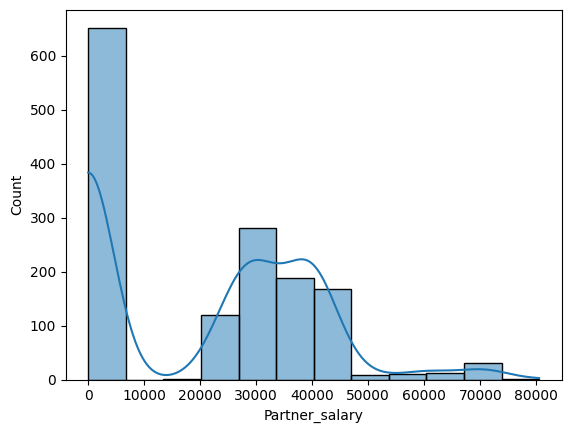

In [7]:
sns.histplot(df['Partner_salary'], kde = True)

As we see from the above histogram that the data is not normally distributed, hence it's not practical to use *mean* to replace the missing values. Also, using *mode* is not wise since this is not a categorical data. Therefore it's best to use *median* to replace the missing values. 

In [8]:
median = df['Partner_salary'].median()
df['Partner_salary'].fillna(median, inplace = True)#replacing the null values in "Partner_salary" with the median of all salaries.

<AxesSubplot: xlabel='Partner_salary', ylabel='Count'>

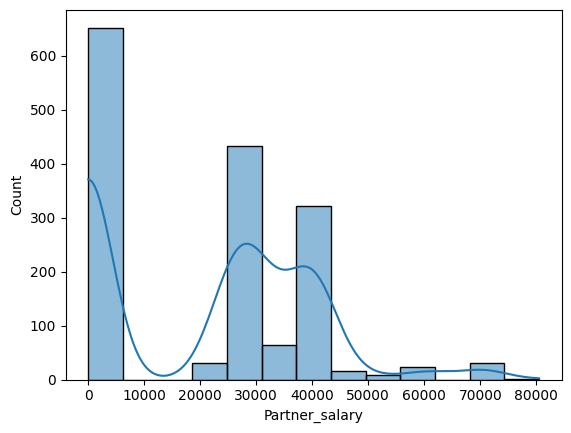

In [9]:
sns.histplot(df['Partner_salary'], kde =True)

In [10]:
#Checking

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


Now comes the gender column.Since this is a categorical column, we can replace the missing values with mode

In [11]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [12]:
df['Gender'].replace('Femal', 'Female', inplace = True)
df['Gender'].replace('Femle', 'Female', inplace = True)
df['Gender'].replace('NaN', 'Male', inplace = True)

In [13]:
df['Gender'].unique() #there are some NaN values to be replaced.

array(['Male', 'Female', nan], dtype=object)

In [14]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

As we see that 'Male' is the mode of the Gender data. So we can use it to replace the NaN values

In [15]:
df['Gender'].fillna('Male', inplace = True)

In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


All the null values treated with appropriate assumptions

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,20585.895003,18952.938643,0.0,0.0,25600.0,38000.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


It's interesting to note that some of the partner salaries are described as 0. This is probably due to unemployment. 

In [18]:
df[df['Partner_salary'] == 0].head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV
10,52,Male,Salaried,Married,Post Graduate,4,Yes,No,No,81600,0.0,81600,67000,SUV
11,50,Male,Salaried,Married,Post Graduate,2,No,No,No,81300,0.0,81300,63000,SUV
12,50,Female,Salaried,Married,Graduate,3,Yes,No,No,77400,0.0,77400,62000,SUV


In [19]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

The information is available for 1581 people and talks about 13 different variables like Personal Loan, Total salary, Education etc. The variables are both categorical and continuous in nature. There are float, integers and object data types available and the memory usage is 173.0+ KB. There were missing values in the fields 'Gender' and 'Partner_slary', which have been treated with appropriate assumptions (Kindly refer to .ipynb file for the code.)

Exploring features using visualisations

C:\Users\psriv\AppData\Local\Temp\ipykernel_19544\2826998212.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True);


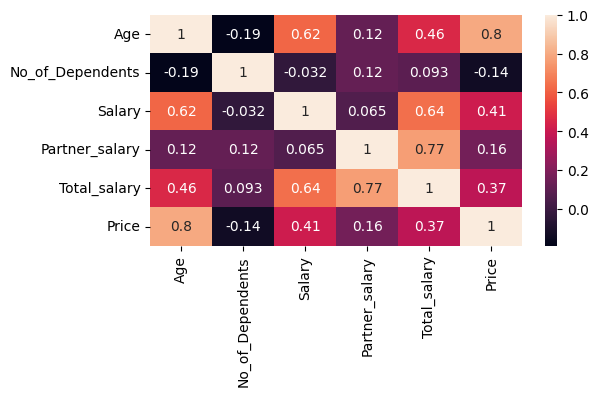

In [20]:
plt.figure(figsize = (6,3))
sns.heatmap(df.corr(), annot = True);

As we see from above:
- ### Salary and age have a decent correlation
- ### Price and age have a strong correlation
- ### Total Salary and Salary are decently correlated
- ### Partner salary and Total Salary are correlated

We can first explore the connection between salary and age

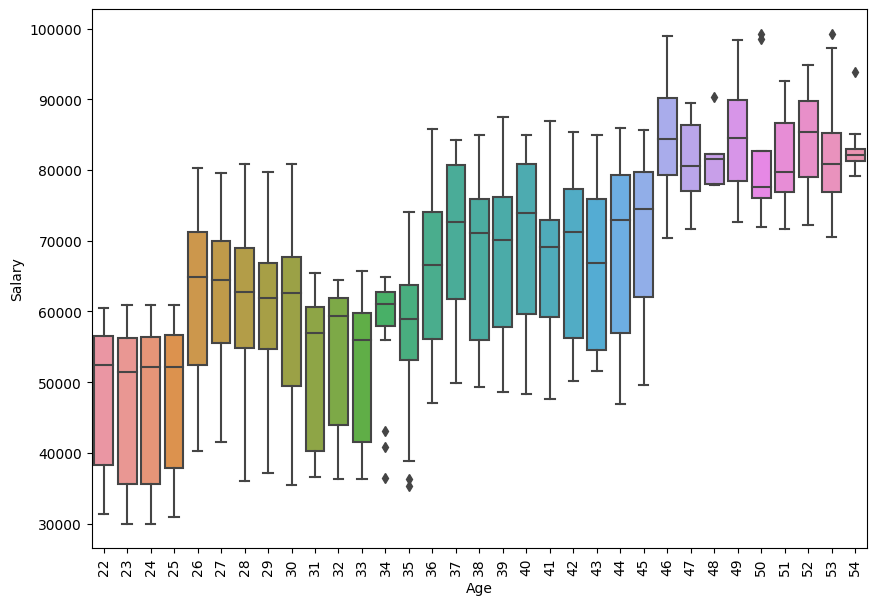

In [21]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
sns.boxplot(df,x=df['Age'], y=df['Salary']);
plt.xticks(rotation = 90);

Salaries tend to grow with Age

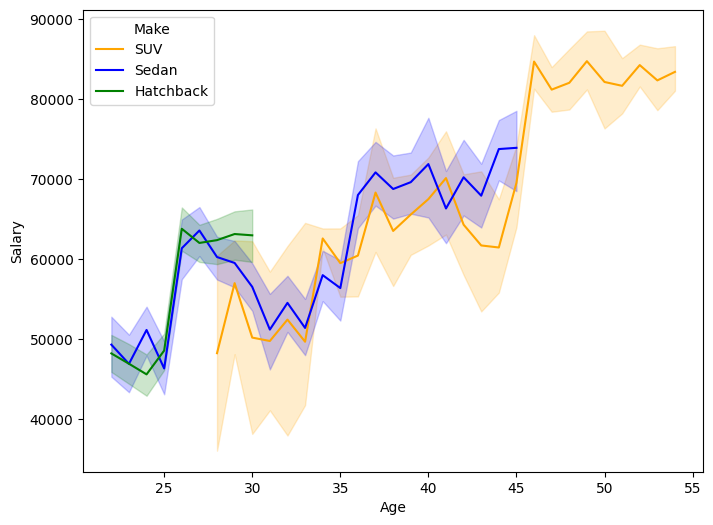

In [33]:
fig = plt.gcf()
fig.set_size_inches(8, 6)
sns.lineplot(df,x=df['Age'], y=df['Salary'], hue= df['Make'], palette=['orange', 'blue', 'green']);

We can form the following inferences from the above two plots:
- During the start of the career, the salaries are relatively low and that's the reason that low priced Sedans and hatchbacks are more popular in smaller age groups.
- As the age increases, the affordability increases and hence people start preferring SUVs. Also, judging from age, the family size might also increase so SUV makes perfect choice. 

<AxesSubplot: xlabel='Education', ylabel='Salary'>

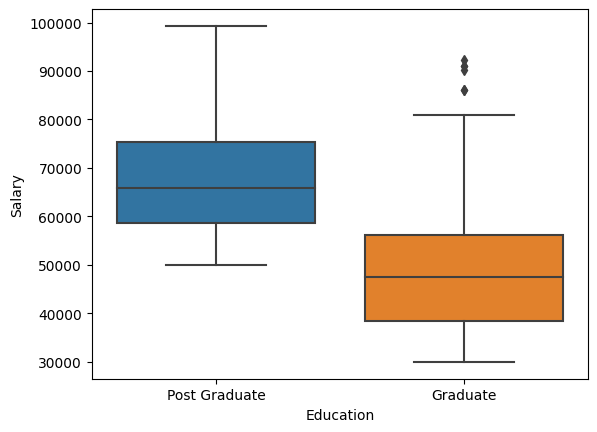

In [54]:
#Education against Salary

sns.boxplot(df, x=df['Education'], y=df['Salary'])

- Average salary of PGs are relatively high with some exceptions at graduate level. 

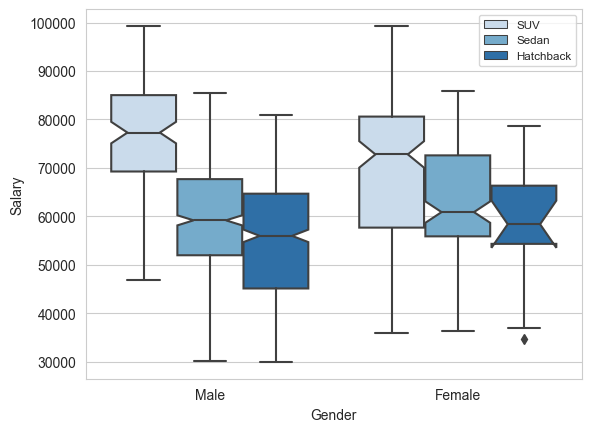

In [426]:
#Salary against gender
ax = sns.boxplot(df, x=df['Gender'], y=df['Salary'], hue=df['Make'], palette = "Blues", notch = True, fliersize=5, saturation=0.8)
sns.set_style("whitegrid")
ax.legend(loc='upper right', fontsize= 'small');

Females earn more than Males at graduate and post graduate levels. This can be leveraged in advertising. Also, this means that graduate males are more likely to fetch personal loans than people from any other category. So discounts/EMI options can be provided for them in some way.

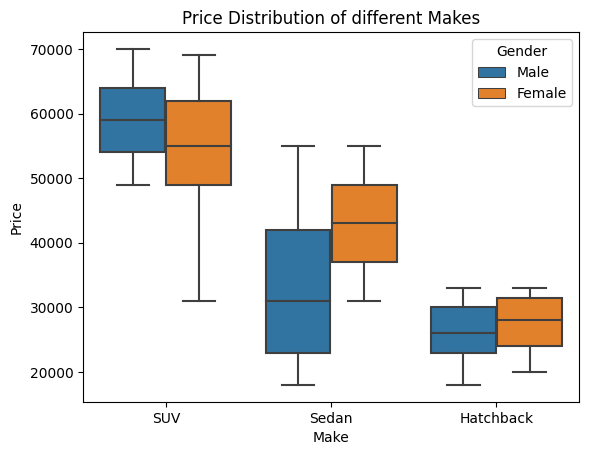

In [31]:
sns.boxplot(df, x = df['Make'], y= df['Price'], hue = df['Gender']);
plt.title('Price Distribution of different Makes');

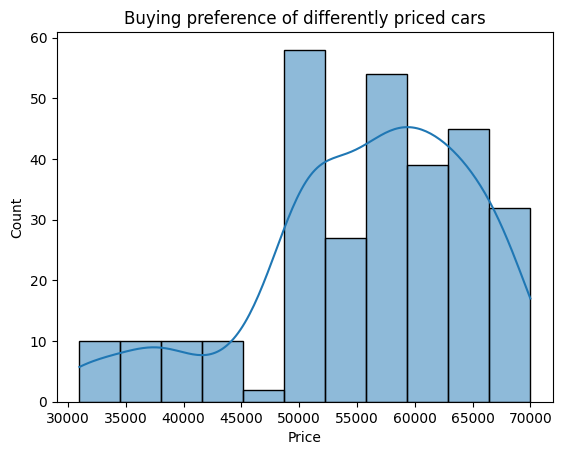

In [27]:
sns.histplot(df, x = df[df['Make'] == 'SUV']['Price'], kde= True);
plt.title('Buying preference of differently priced cars');

### From the above two graphs

- Females prefer high end Sedan make than Males, hence the advertisements may show men driving high end Sedans if the focus is to increase sales of Sedans amongst men. 
- Relatively less people buy low cost hatchback models. So the company can increase features and thereby the cost to compete the hatchback models with Sedans. This will give more choice to the customers as well between the range of 32000 and 50000 range.
- As far as SUVs are concerned, people are willing to spend anywhere between 50000 and 65000. So aggressive marketing can be done for the low end SUV category
- Sedan seems to be the most preferred category amongst males and females. Money should be spent on the marketing of SUVs and Hatchbacks. 

In [153]:
print("Total SUVs bought= "+ str(df[df['Make']== 'SUV']['Price'].value_counts().sum())) #Total SUVs bought
print("Total Sedans bought= "+ str(df[df['Make']== 'Sedan']['Price'].value_counts().sum())) #Total Sedans bought
print("Total Hatchbacks bought= "+ str(df[df['Make']== 'Hatchback']['Price'].value_counts().sum())) #Total Hatchbacks bought

Total SUVs bought= 297
Total Sedans bought= 702
Total Hatchbacks bought= 582


In [154]:
print("Average cost of SUV= "+ str(df[df['Make']== 'SUV']['Price'].mean())) #Average cost of SUV
print("Average cost of Sedan= "+ str(df[df['Make']== 'Sedan']['Price'].mean())) #Average Cost of Sedan
print("Average cost of Sedan= "+ str(df[df['Make']== 'Hatchback']['Price'].mean())) #Average Cost of Hatchbacks

Average cost of SUV= 55824.91582491583
Average cost of Sedan= 34603.988603988604
Average cost of Sedan= 26474.22680412371


Revenue generated by each segment can be calculated

In [145]:
print("Revenue generated by SUV is: Rs." + str(df[df['Make']== 'SUV']['Price'].sum()))
print("Revenue generated by Sedan is: Rs." + str(df[df['Make']== 'Sedan']['Price'].sum()))
print("Revenue generated by Hatchback is: Rs." + str(df[df['Make']== 'Hatchback']['Price'].sum()))

Revenue generated by SUV is: Rs.16580000
Revenue generated by Sedan is: Rs.24292000
Revenue generated by Hatchback is: Rs.15408000


As we can see from the above results that Sedans generate the most revenue amongst the three.
Since, Sedans are being bought more, we can increase the price of the cars a little bit due to popularity.

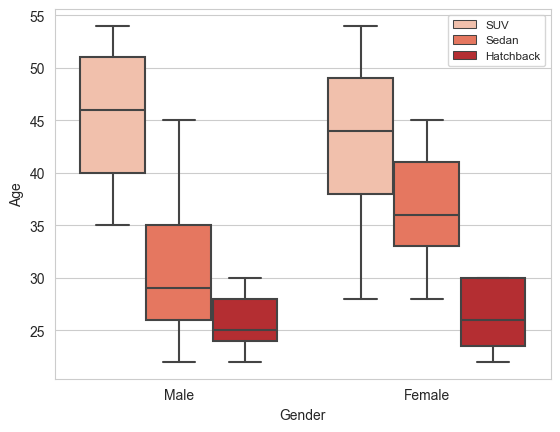

In [176]:
ax = sns.boxplot(df, x=df['Gender'], y=df['Age'], hue=df['Make'], palette = "Reds")
sns.set_style("whitegrid")
ax.legend(loc='upper right', fontsize= 'small');

As it's evident from the plot, 30 years is the maximum age at which people buy hatchbacks. That means, there's a clear preference that after 30 years people are either going for a SUV or a Sedan. Same is the case for Sedan at 45 years of age. So the marketing should be focused on these groups of people between 22 and 30 years of age. 

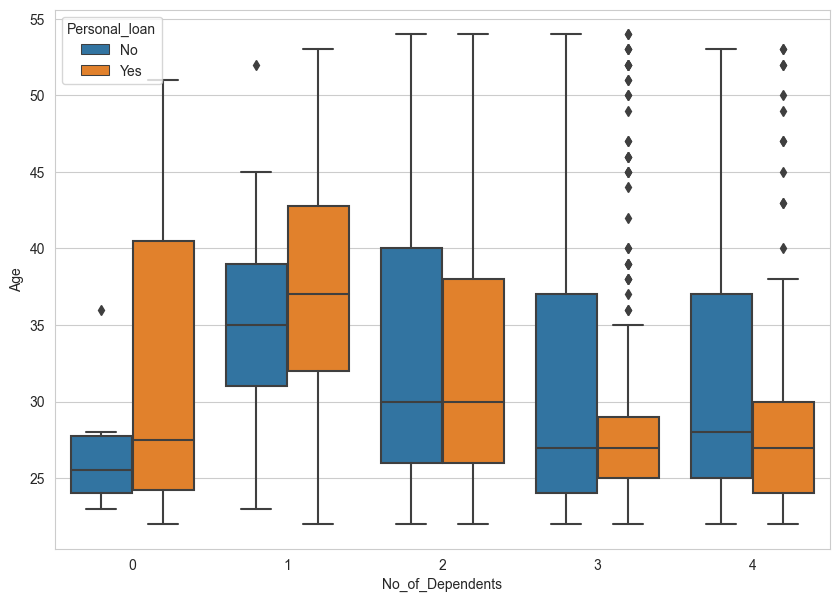

In [207]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
sns.boxplot(df, y=df['Age'], x=df['No_of_Dependents'], hue = df['Personal_loan'])
sns.set_style("whitegrid")
ax.legend(loc='upper right', fontsize= 'small');

- People usually with no dependent are more likely to take personal loans.
- People with 3 or more dependents are usually taking loans after 35-38 years of age.

In [257]:
df[df['Gender']=='Male']['Make'].value_counts()

Hatchback    567
Sedan        561
SUV          124
Name: Make, dtype: int64

In [258]:
df[df['Gender']=='Female']['Make'].value_counts()

SUV          173
Sedan        141
Hatchback     15
Name: Make, dtype: int64

In [251]:
df[df['Make'] == 'Sedan']['Profession'].value_counts()

Salaried    396
Business    306
Name: Profession, dtype: int64

In [252]:
df[df['Make'] == 'SUV']['Profession'].value_counts()

Salaried    208
Business     89
Name: Profession, dtype: int64

In [253]:
df[df['Make'] == 'Hatchback']['Profession'].value_counts()

Salaried    292
Business    290
Name: Profession, dtype: int64

In [262]:
print('Money spent by males: ' + str(df[df['Gender']=='Male']['Price'].sum()))
print('Money spent by females: ' + str(df[df['Gender']=='Female']['Price'].sum()))

Money spent by males: 40585000
Money spent by females: 15695000


In [304]:
df.head(2)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV


In [323]:
df[df['Personal_loan'] == 'Yes']['No_of_Dependents'].value_counts()

2    291
3    256
1    134
4     97
0     14
Name: No_of_Dependents, dtype: int64

### Age distribution by car make

<AxesSubplot: xlabel='Make', ylabel='Age'>

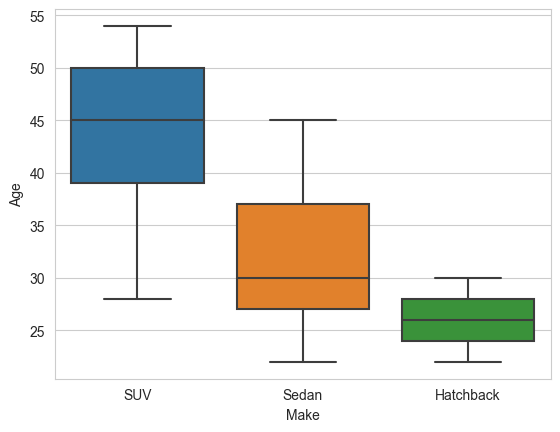

In [341]:
sns.boxplot(df, y=df['Age'], x=df['Make'])

<AxesSubplot: xlabel='Personal_loan', ylabel='Price'>

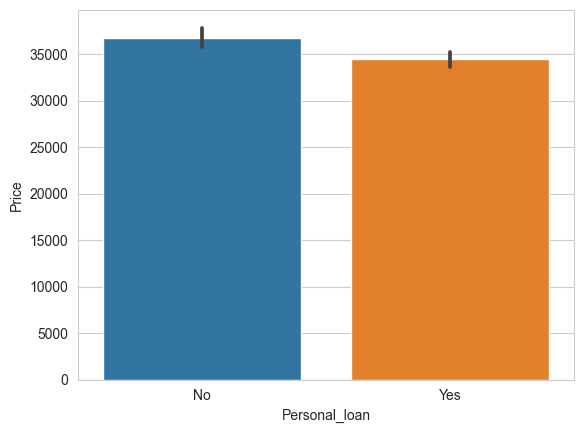

In [369]:
sns.barplot(df, x=df['Personal_loan'], y=df['Price'])

### Age
- Which age group buys what kind of car : *SUV: 45-50; Sedan/SUV: 35-45; HB: 25-30*
- What age group buys the most cars: *People between the age 22-30 buy the most cars.*
- What age group earns the most and the least, based on that we can target the more earning age group: *Linear relationship*
- Which age group prefers taking personal loan. *Females prefer taking personal loans after 33 years while Males prefer it a lot sooner*

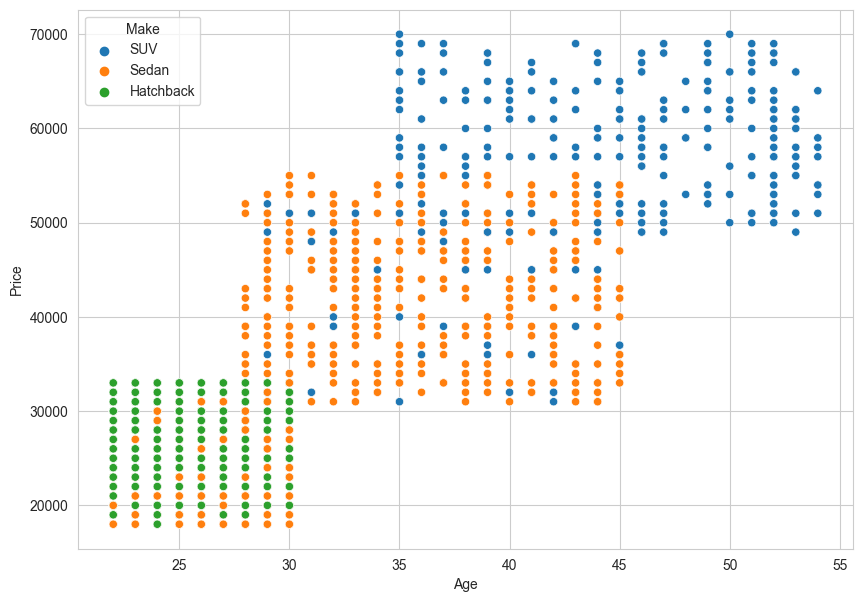

In [377]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
sns.scatterplot(df, x=df['Age'], y=df['Price'], hue=df['Make']);

Older people prefer to buy more expensive cars and predominantly SUVs.

In [381]:
df['Age'].value_counts() 

28    119
25    118
30    117
29    110
24    104
23    103
27     97
26     96
22     94
39     41
35     41
44     40
38     38
36     35
45     34
42     34
43     34
33     33
37     31
32     30
52     28
41     27
40     25
34     24
46     22
31     21
53     19
47     15
49     15
51     14
50      9
54      8
48      5
Name: Age, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Salary'>

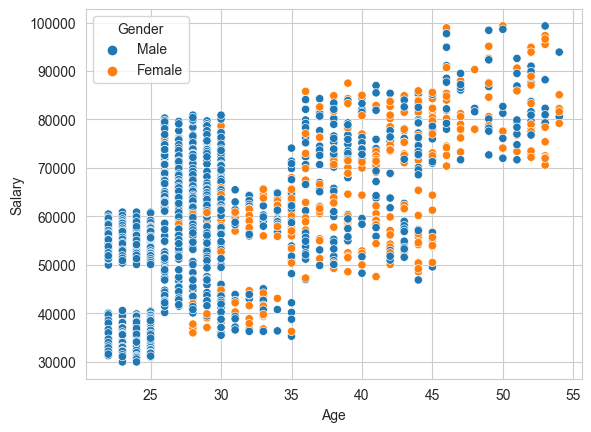

In [387]:
sns.scatterplot(df, x=df['Age'], y=df['Salary'], hue = df['Gender'])

<AxesSubplot: xlabel='Personal_loan', ylabel='Age'>

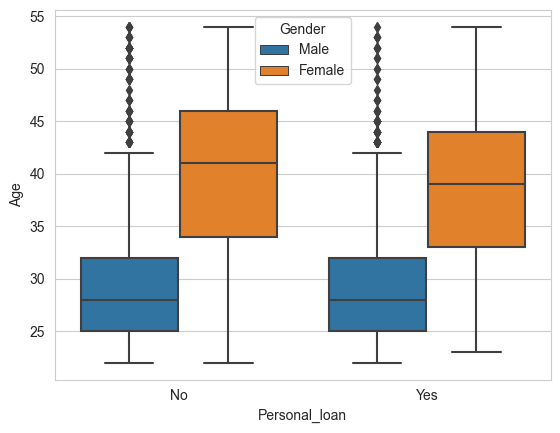

In [404]:
sns.boxplot(df,x=df['Personal_loan'], y=df['Age'], hue=df['Gender'])

In [413]:
df[df['House_loan']=='Yes']['Age'].value_counts().sort_values()

40     6
43     8
41     8
45     8
38     9
44     9
42    10
35    10
31    10
34    11
33    11
36    12
37    12
32    15
39    15
22    27
27    33
24    38
23    38
26    39
29    45
25    45
30    54
28    54
Name: Age, dtype: int64

### Gender
- Which gender buys more cars and what kind of cars. **Males buy more of Sedans and Hatchbacks and Females buy SUVs more. That's due to the fact that females earn more than Males
- How's the salary distribution w.r.t gender? Is it in line with the kind of make they buy?
- Which gender has a higher number of dependents. Depending on that, they will buy a bigger/smaller car.
- Which gender prefers buying cheaper/expensive cars.
- Which gender has higher salary, are they preferring to buy a bigger car due to that?

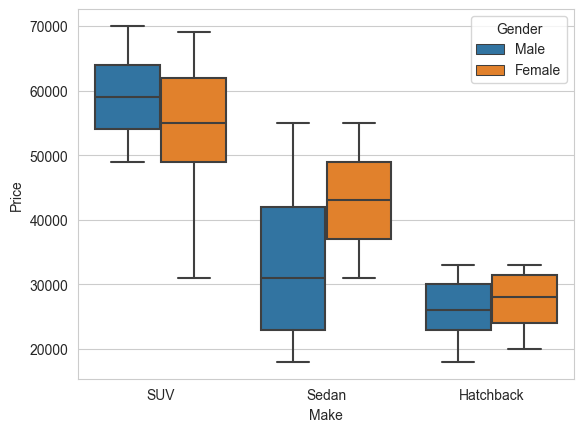

In [417]:
sns.boxplot(df, x = df['Make'], y= df['Price'], hue = df['Gender']);

In [420]:
df[df['Gender']=='Male']['Make'].value_counts().sort_values() #Males prefer buying Sedan and Hatchbacks almost equally. Can be due to financial constraint

SUV          124
Sedan        561
Hatchback    567
Name: Make, dtype: int64

In [422]:
df[df['Gender']=='Female']['Make'].value_counts().sort_values() #Females prefer buying SUVs since they earn relatively more.

Hatchback     15
Sedan        141
SUV          173
Name: Make, dtype: int64

<AxesSubplot: xlabel='Make', ylabel='Count'>

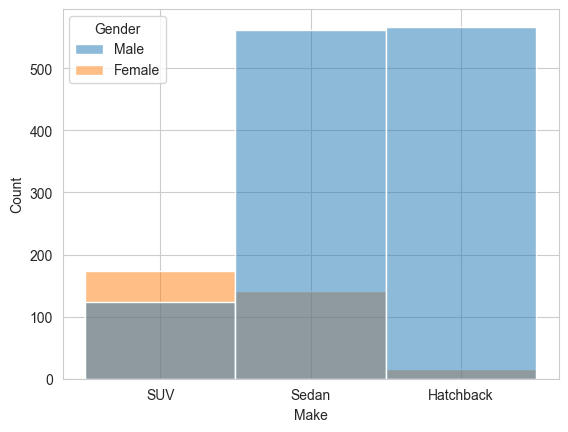

In [425]:
sns.histplot(df, x=df['Make'], hue=df['Gender'])

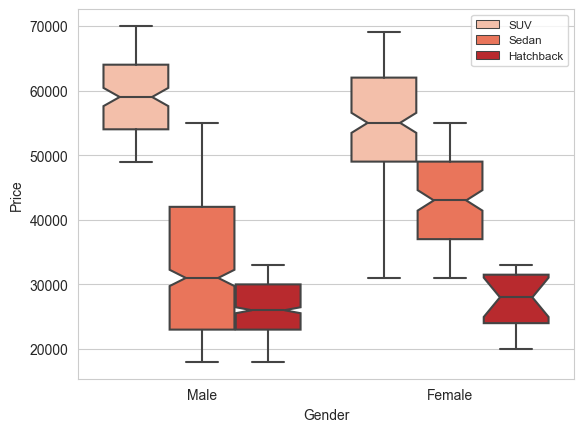

In [435]:
#Salary against gender
ax = sns.boxplot(df, x=df['Gender'], y=df['Price'], hue=df['Make'], palette = "Reds", notch = True, fliersize=5, saturation=0.8)
sns.set_style("whitegrid")
ax.legend(loc='upper right', fontsize= 'small');

<AxesSubplot: xlabel='Make', ylabel='Price'>

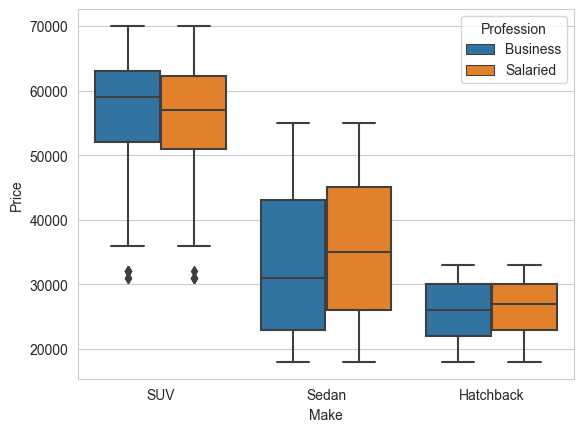

In [444]:
sns.boxplot(df, x= df['Make'], y=df['Price'], hue=df['Profession'])

In [438]:
df[df['Make']=='SUV']['Profession'].value_counts()

Salaried    208
Business     89
Name: Profession, dtype: int64

In [439]:
df[df['Make']=='Sedan']['Profession'].value_counts()

Salaried    396
Business    306
Name: Profession, dtype: int64

In [440]:
df[df['Make']=='Hatchback']['Profession'].value_counts()

Salaried    292
Business    290
Name: Profession, dtype: int64

Salaried people prefer to buy more SUVs than business class

### From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

<AxesSubplot: xlabel='Partner_salary', ylabel='Price'>

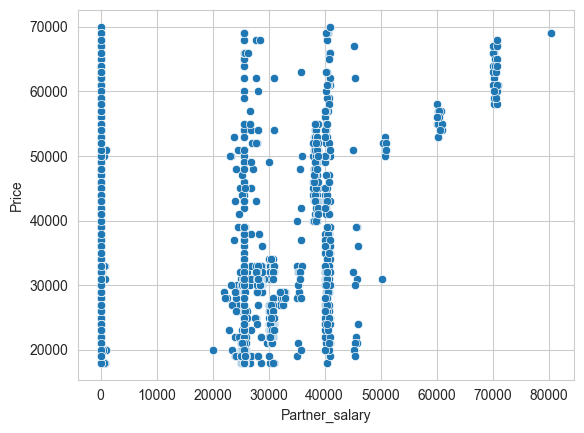

In [458]:
sns.scatterplot(df, x=df['Partner_salary'], y=df['Price'])

As we see from the above analysis, even for the partner salary of 0 (not working), people are still clearly buying high priced cars. So this means that having a working partner does not affect the buying choices. 

###  The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

<AxesSubplot: xlabel='Make', ylabel='Price'>

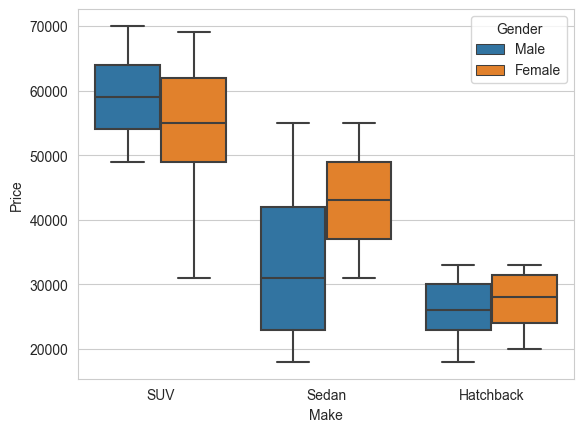

In [462]:
sns.boxplot(df, x = df['Make'], y = df['Price'], hue = df['Gender'])

<AxesSubplot: xlabel='Price', ylabel='Make'>

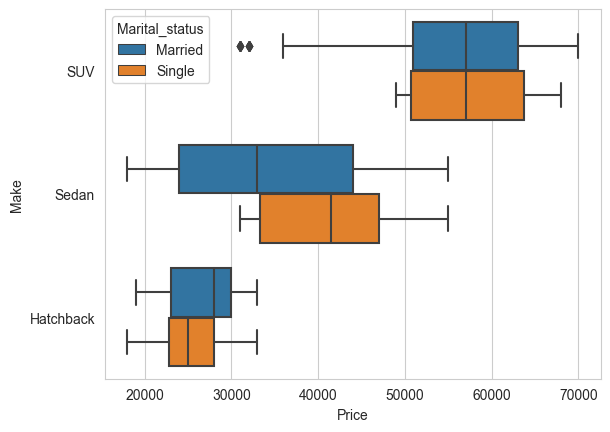

In [467]:
sns.boxplot(df, x = df['Price'], y = df['Make'], hue = df['Marital_status'])

In [502]:
print('Number of single people buying cars: ' + str(df[df['Marital_status'] == 'Single']['Price'].count()))
print('Number of married people buying cars: ' + str(df[df['Marital_status'] == 'Married']['Price'].count()))

Number of single people buying cars: 138
Number of married people buying cars: 1443


In [519]:
print('Make distribution amongst females:\n'+ str(df[df['Gender'] == 'Female']['Make'].value_counts().to_string(header=False, dtype=False)))
print('Make distribution amongst males:\n'+ str(df[df['Gender'] == 'Male']['Make'].value_counts().to_string(header=False, dtype=False)))

Make distribution amongst females:
SUV          173
Sedan        141
Hatchback     15
Make distribution amongst males:
Hatchback    567
Sedan        561
SUV          124


In [518]:
print('Distribution with respect to marital status amongst females:\n'+ str(df[df['Gender'] == 'Female']['Marital_status'].value_counts().to_string(header=False, dtype=False)))
print('Distribution with respect to marital status amongst males:\n'+ str(df[df['Gender'] == 'Male']['Marital_status'].value_counts().to_string(header=False, dtype=False)))

Distribution with respect to marital status amongst females:
Married    307
Single      22
Distribution with respect to marital status amongst males:
Married    1136
Single      116


## Conclusions:
- Males prefer buying cars, priced between 18000 and 33000. Females like to spend more on cars somewhere between 30000-60000
- Males prefer buying Hatchbacks and Sedans almost equally. Females prefer buying SUVs over the other two makes.
- Single People like to buy Hatchbacks over Sedans and SUVs. Married people prefer buying Sedans. 
- Married people buy more cars than single people